In [52]:
# scikit
from sklearn import preprocessing
from sklearn.linear_model import SGDClassifier
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier

# My code
import data.preprocessing as preproc
import project_fxns.rt_window_prediction as rtwin
import numpy as np
                                            
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
local_path = '/home/irockafe/Dropbox (MIT)/Alm_Lab/projects/'  
project_path = '/revo_healthcare/data/processed/ST000450/'  
fname = '/ST000450_AN000705_positive_hilic.txt'  
mwtab_path = local_path+project_path+fname                        
                                                                  
# get feature table,        
# class labels (y)          
# and metadata from mwtab file
df_raw, y, metadata = preproc.mwtab_to_feature_table(mwtab_path)

you'll probably have to conver this dataframe to float after youreplace null values
df shape (84, 226)
metadata shape (84, 2)


In [15]:
# Preprocess feature table      
# Replace NaNs
df_raw = df_raw.replace('\N', np.nan)
df_raw = df_raw.astype(float)


In [30]:
# Correct for dilution factor
df_pqn = preproc.correct_dilution_factor(df_raw)


# Impute missing values as 1/2 min
min_vals = df_pqn.min(axis=1).min() / 2
df_pqn_filled_halfmin = df_pqn.fillna(value=min_vals)
# Scale data using subtracting median and divide by IQR 
df_pqn_filled_halfmin_scaled = (preprocessing.RobustScaler()
                                .fit_transform(df_pqn_filled_halfmin))


0.0% done! 0.00390815734863s elapsed
20.0% done! 0.0352771282196s elapsed
40.0% done! 0.0541851520538s elapsed
60.0% done! 0.0706071853638s elapsed
80.0% done! 0.0863230228424s elapsed


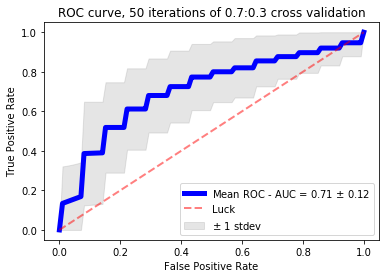

In [63]:
# what about elastic-net regularized logistic regression?
random_state = 1
test_size = 0.3
n_iter = 50
n_trees = 1000
cross_val = StratifiedShuffleSplit(y, n_iter=n_iter, test_size=test_size,
                                  random_state=random_state)
clf = SGDClassifier(loss='log', penalty='l2', 
                   alpha=0.1,) #l1_ratio=0.2)

auc_vals = rtwin.roc_curve_cv(df_pqn_filled_halfmin_scaled, y, clf, cross_val,
                  save=False)



0.0% done! 3.15357708931s elapsed
20.0% done! 37.4759919643s elapsed
40.0% done! 72.2883050442s elapsed
60.0% done! 104.873532057s elapsed
80.0% done! 136.585879087s elapsed


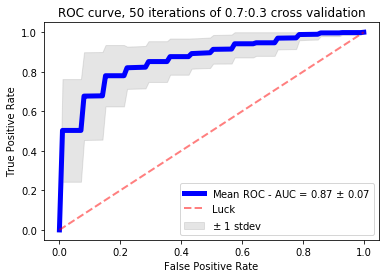

In [54]:
random_state = 1
test_size = 0.3
n_iter = 50
n_trees = 1000
cross_val = StratifiedShuffleSplit(y, n_iter=n_iter, test_size=test_size,
                                  random_state=random_state)
clf = RandomForestClassifier(n_estimators=n_trees,
                            random_state=random_state)


auc_vals = rtwin.roc_curve_cv(df_pqn_filled_halfmin_scaled, y, clf, cross_val,
                  save=False)

In [69]:
import os
os.getcwdu().split('revo_healthcare')

[u'/home/irockafe/Dropbox (MIT)/Alm_Lab/projects/', u'/notebooks/ST000450']